In [31]:
import parselmouth
from parselmouth.praat import call
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis

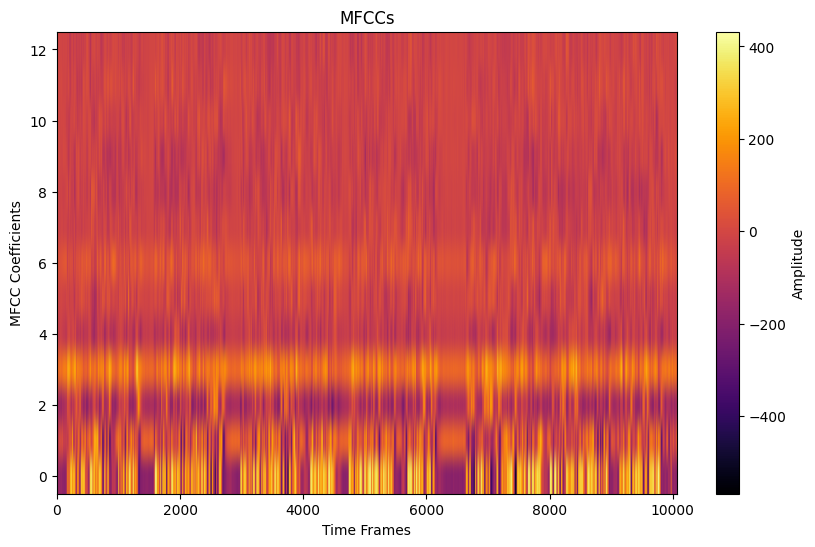

In [ ]:
## save this for adding it to plot.ipynb

sound = parselmouth.Sound(audio_file)
mfcc_obj = sound.to_mfcc(number_of_coefficients=13)

mfcc_matrix = mfcc_obj.to_matrix().values
mfcc_matrix.shape

plt.figure(figsize=(10, 6))
plt.imshow(mfcc_matrix, aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(label="Amplitude")
plt.xlabel("Time Frames")
plt.ylabel("MFCC Coefficients")
plt.title("MFCCs")
plt.show()

In [38]:
audio_file = 'audio_files_segments/VOW/1234567/1234567_0_VOW_1a_pre.wav'

In [76]:
def glottal(audio_file, f0_min, f0_max):

    sound = parselmouth.Sound(audio_file)
    pitch = sound.to_pitch_cc(time_step=0.005, pitch_floor=f0_min, pitch_ceiling=f0_max)  

    f0 = pitch.selected_array['frequency']
    f0 = f0[f0 > 0] ## this removes unvoiced frames

    if len(f0) == 0:
        print("No frames were detected during PP_F0 extraction, check audio file")
        return None

    mean_f0 = np.mean(f0)

    H1_freq = mean_f0
    H2_freq = 2 * mean_f0
    
    frequencies = spectrogram.ys()
    
    H1_index = np.argmin(np.abs(frequencies - H1_freq))
    H2_index = np.argmin(np.abs(frequencies - H2_freq))
    
    spectrogram = sound.to_spectrogram(window_length=0.03, time_step=0.005)
    
    spectrogram_values = spectrogram.values

    # Find the max power across time frames at H1 and H2 frequencies
    H1_power = np.max(spectrogram_values[H1_index, :])  # Max power across all time frames for H1
    H2_power = np.max(spectrogram_values[H2_index, :])  # Max power across all time frames for H2

    # Convert power to decibels (dB)
    H1_dB = 10 * np.log10(H1_power) if H1_power > 0 else -np.inf
    H2_dB = 10 * np.log10(H2_power) if H2_power > 0 else -np.inf

    # Calculate the H1H2 difference
    H1H2_diff = H1_dB - H2_dB

    print(f"F0 (H1 frequency): {H1_freq:.2f} Hz")
    print(f"H1-H2 Difference: {H1H2_diff:.2f} dB")

    return H1H2_diff

In [ ]:
glottal(audio_file=audio_file, f0_min=60, f0_max=300)


UnboundLocalError: local variable 'spectrogram' referenced before assignment